In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Read in all the data from each subreddit and time interval

# MentalHealthRedditData
PreCovidMentalHealthRedditData = pd.read_csv('/Users/willjohnston/Documents/GitHub/Covid-and-Reddit/VaderRobertaSentimentComparison/Datasets/PreCovidAnxietyRedditData.csv')
PreCovidMentalHealthRedditData = PreCovidMentalHealthRedditData.reset_index().rename(columns={'index': 'ID'})
DuringCovidMentalHealthRedditData = pd.read_csv('/Users/willjohnston/Documents/GitHub/Covid-and-Reddit/VaderRobertaSentimentComparison/Datasets/DuringCovidAnxietyRedditData.csv')
DuringCovidMentalHealthRedditData = DuringCovidMentalHealthRedditData.reset_index().rename(columns={'index': 'ID'})
PostCovidMentalHealthRedditData = pd.read_csv('/Users/willjohnston/Documents/GitHub/Covid-and-Reddit/VaderRobertaSentimentComparison/Datasets/PostCovidAnxietyRedditData.csv')
PostCovidMentalHealthRedditData = PostCovidMentalHealthRedditData.reset_index().rename(columns={'index': 'ID'})



In [2]:
!pip install transformers


[notice] A new release of pip is available: 23.0.1 -> 23.1.1
[notice] To update, run: pip install --upgrade pip


In [3]:
from tqdm.notebook import tqdm
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [4]:
def polarity_scores_roberta(example):
    encoded_text = tokenizer(example, return_tensors='pt')
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [5]:
# Run for Roberta Model for MentalHealthRedditData Titles and Content
PreCovidMentalHealthRedditDataTitle = {}
PreCovidMentalHealthRedditDataContent = {}

DuringCovidMentalHealthRedditDataTitle = {}
DuringCovidMentalHealthRedditDataContent = {}

PostCovidMentalHealthRedditDataTitle = {}
PostCovidMentalHealthRedditDataContent = {}

AllMentalHealthRedditDataTitle = {}
AllMentalHealthRedditDataContent = {}

for i, row in tqdm(PreCovidMentalHealthRedditData.iterrows(), total=len(PreCovidMentalHealthRedditData)):
    try:
        preTitle = str(row['Title'])
        PreCovidMentalHealthRedditDataTitle[i] = polarity_scores_roberta(preTitle)
    except RuntimeError:
        print(f'Broke for Pre Title id {i}')
    try:
        preContent = str(row['Content'])
        PreCovidMentalHealthRedditDataContent[i] = polarity_scores_roberta(preContent)
    except RuntimeError:
        print(f'Broke for Pre Content id {i}')

for j, row in tqdm(DuringCovidMentalHealthRedditData.iterrows(), total=len(DuringCovidMentalHealthRedditData)):
    try:
        duringTitle = str(row['Title'])
        DuringCovidMentalHealthRedditDataTitle[j] = polarity_scores_roberta(duringTitle)
    except RuntimeError:
        print(f'Broke for During Title id {j}')
    try:
        duringContent = str(row['Content'])
        DuringCovidMentalHealthRedditDataContent[j] = polarity_scores_roberta(duringContent)
    except RuntimeError:
        print(f'Broke for During Content id {j}')

for k, row in tqdm(PostCovidMentalHealthRedditData.iterrows(), total=len(PostCovidMentalHealthRedditData)):
    try:
        postTitle = str(row['Title'])
        PostCovidMentalHealthRedditDataTitle[k] = polarity_scores_roberta(postTitle)
    except RuntimeError:
        print(f'Broke for Post Title id {k}')
    try:
        postContent = str(row['Content'])
        PostCovidMentalHealthRedditDataContent[k] = polarity_scores_roberta(postContent)
    except RuntimeError:
        print(f'Broke for Post Content id {k}')

  0%|          | 0/227 [00:00<?, ?it/s]

Broke for Pre Content id 81
Broke for Pre Content id 113
Broke for Pre Content id 125
Broke for Pre Content id 141
Broke for Pre Content id 163
Broke for Pre Content id 178
Broke for Pre Content id 194


  0%|          | 0/337 [00:00<?, ?it/s]

Broke for During Content id 50
Broke for During Content id 55
Broke for During Content id 69
Broke for During Content id 95
Broke for During Content id 113
Broke for During Content id 125
Broke for During Content id 143
Broke for During Content id 147
Broke for During Content id 226
Broke for During Content id 266
Broke for During Content id 269
Broke for During Content id 294


  0%|          | 0/209 [00:00<?, ?it/s]

Broke for Post Content id 18
Broke for Post Content id 31
Broke for Post Content id 73
Broke for Post Content id 84
Broke for Post Content id 127
Broke for Post Content id 150
Broke for Post Content id 164
Broke for Post Content id 168
Broke for Post Content id 177
Broke for Post Content id 184


In [6]:
preMentalHealthTitle = PreCovidMentalHealthRedditDataTitle
preMentalHealthContent = PreCovidMentalHealthRedditDataContent
preMentalHealthTitleDF = pd.DataFrame(preMentalHealthTitle).T
preMentalHealthContentDF = pd.DataFrame(preMentalHealthContent).T
preMentalHealthTitleDF = preMentalHealthTitleDF.reset_index().rename(columns={'index': 'ID'})
preMentalHealthContentDF = preMentalHealthContentDF.reset_index().rename(columns={'index': 'ID'})
preMentalHealthTitleDF = preMentalHealthTitleDF.merge(PreCovidMentalHealthRedditData, on='ID', how='left')
preMentalHealthContentDF = preMentalHealthContentDF.merge(PreCovidMentalHealthRedditData, on='ID', how='left')

duringMentalHealthTitle = DuringCovidMentalHealthRedditDataTitle
duringMentalHealthContent = DuringCovidMentalHealthRedditDataContent
duringMentalHealthTitleDF = pd.DataFrame(duringMentalHealthTitle).T
duringMentalHealthContentDF = pd.DataFrame(duringMentalHealthContent).T
duringMentalHealthTitleDF = duringMentalHealthTitleDF.reset_index().rename(columns={'index': 'ID'})
duringMentalHealthContentDF = duringMentalHealthContentDF.reset_index().rename(columns={'index': 'ID'})
duringMentalHealthTitleDF = duringMentalHealthTitleDF.merge(DuringCovidMentalHealthRedditData, on='ID', how='left')
duringMentalHealthContentDF = duringMentalHealthContentDF.merge(DuringCovidMentalHealthRedditData, on='ID', how='left')

postMentalHealthTitle = PostCovidMentalHealthRedditDataTitle
postMentalHealthContent = PostCovidMentalHealthRedditDataContent
postMentalHealthTitleDF = pd.DataFrame(postMentalHealthTitle).T
postMentalHealthContentDF = pd.DataFrame(postMentalHealthContent).T
postMentalHealthTitleDF = postMentalHealthTitleDF.reset_index().rename(columns={'index': 'ID'})
postMentalHealthContentDF = postMentalHealthContentDF.reset_index().rename(columns={'index': 'ID'})
postMentalHealthTitleDF = postMentalHealthTitleDF.merge(PostCovidMentalHealthRedditData, on='ID', how='left')
postMentalHealthContentDF = postMentalHealthContentDF.merge(PostCovidMentalHealthRedditData, on='ID', how='left')

preMentalHealthTitleDF.head()

,ID,roberta_neg,roberta_neu,roberta_pos,subReddit,Title,Content,Top Comment,upvotes,Number of comments,date,uniquePostID
0,0,0.010173,0.049017,0.940810,Anxiety,Today I promised myself bacon and eggs if I co...,NaN,Good for you! Whenever I see something with an...,6044,98,2019-03-15 01:55:17,b18zmk
1,1,0.244388,0.598412,0.157200,Anxiety,"Professor here, if you have missed class, plea...","Hello, I’ve read a lot of posts recently about...","Just as an ironic heads-up, I stay up at night...",5206,131,2019-02-20 06:39:13,asl2gr
2,2,0.003054,0.051403,0.945542,Anxiety,"Have my first real, adult, job interview today...",NaN,Fuck yeah! You got this and you're going to ro...,5149,115,2019-02-26 16:08:35,av1397
3,3,0.060216,0.870392,0.069392,Anxiety,Message from your future self,NaN,I really needed to see this today. Thank you.,4747,59,2019-03-19 17:40:14,b30dr2
4,4,0.946909,0.049381,0.003709,Anxiety,1. Anxiety makes it hard to go to sleep 2. Dep...,Just one of the hellish cycles that anxiety ge...,Meeeeeeee. I keep promising myself to switch o...,4608,111,2019-09-16 21:07:27,d56opw


date
1     0.478062
2     0.392532
3     0.303337
4     0.478568
5     0.247400
6     0.538858
7     0.543486
8     0.639458
9     0.756174
10    0.366497
11    0.290929
12    0.418060
dtype: float64
date
1     0.296335
2     0.375911
3     0.315917
4     0.573402
5     0.563137
6     0.573345
7     0.503226
8     0.481306
9     0.428070
10    0.430234
11    0.410383
12    0.316402
dtype: float64
date
1     0.479182
2     0.455316
3     0.548789
4     0.540186
5     0.464782
6     0.471666
7     0.504408
8     0.551508
9     0.376475
10    0.320895
11    0.301192
12    0.580548
dtype: float64


/var/folders/y5/24b2cc596dx6g22jggfvy_lm0000gn/T/ipykernel_47376/3851625702.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


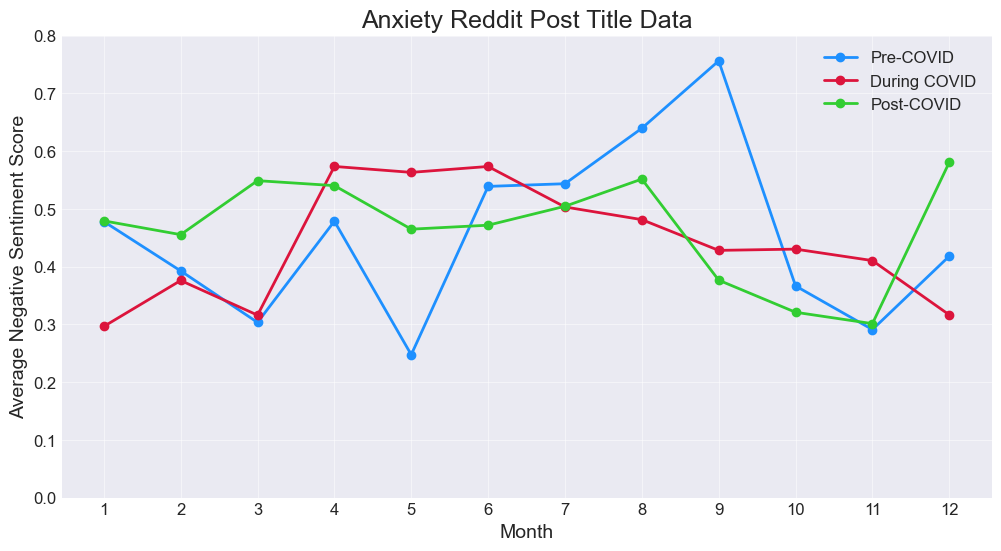

In [9]:
def postsPerMonth(df):
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    return df.groupby('month').count()['uniquePostID']

def postsSumNegByMonth(df):
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    return df.groupby(df['date'].dt.month)['roberta_neg'].sum()

preCovidPostPerMonthData = postsPerMonth(preMentalHealthTitleDF)
perCovidPostPerMonthNegSum = postsSumNegByMonth(preMentalHealthTitleDF)
preCovidNegPerMonthAverage = perCovidPostPerMonthNegSum / preCovidPostPerMonthData
print(preCovidNegPerMonthAverage)

duringCovidPostPerMonthData = postsPerMonth(duringMentalHealthTitleDF)
duringCovidPostPerMonthNegSum = postsSumNegByMonth(duringMentalHealthTitleDF)
duringCovidNegPerMonthAverage = duringCovidPostPerMonthNegSum / duringCovidPostPerMonthData
print(duringCovidNegPerMonthAverage)

postCovidPostPerMonthData = postsPerMonth(postMentalHealthTitleDF)
postCovidPostPerMonthNegSum = postsSumNegByMonth(postMentalHealthTitleDF)
postCovidNegPerMonthAverage = postCovidPostPerMonthNegSum / postCovidPostPerMonthData
print(postCovidNegPerMonthAverage)

plt.style.use('seaborn-darkgrid')

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(preCovidNegPerMonthAverage, label='Pre-COVID', color='dodgerblue', linewidth=2, marker='o')
plt.plot(duringCovidNegPerMonthAverage, label='During COVID', color='crimson', linewidth=2, marker='o')
plt.plot(postCovidNegPerMonthAverage, label='Post-COVID', color='limegreen', linewidth=2, marker='o')

# Customize the plot
plt.title('Anxiety Reddit Post Title Data', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Negative Sentiment Score', fontsize=14)
plt.xticks(range(1, 13), fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, .8)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

# Show the plot
plt.show()

date
1     0.355287
2     0.315693
3     0.314336
4     0.361945
5     0.233437
6     0.402195
7     0.439834
8     0.458517
9     0.535487
10    0.341714
11    0.210459
12    0.391530
dtype: float64
date
1     0.225354
2     0.306908
3     0.384005
4     0.495711
5     0.526733
6     0.537820
7     0.425060
8     0.371966
9     0.530571
10    0.355734
11    0.312725
12    0.365584
dtype: float64
date
1     0.413786
2     0.503437
3     0.383778
4     0.410806
5     0.529881
6     0.472968
7     0.465020
8     0.449019
9     0.402915
10    0.229453
11    0.478639
12    0.709501
dtype: float64


/var/folders/y5/24b2cc596dx6g22jggfvy_lm0000gn/T/ipykernel_47376/306076810.py:26: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


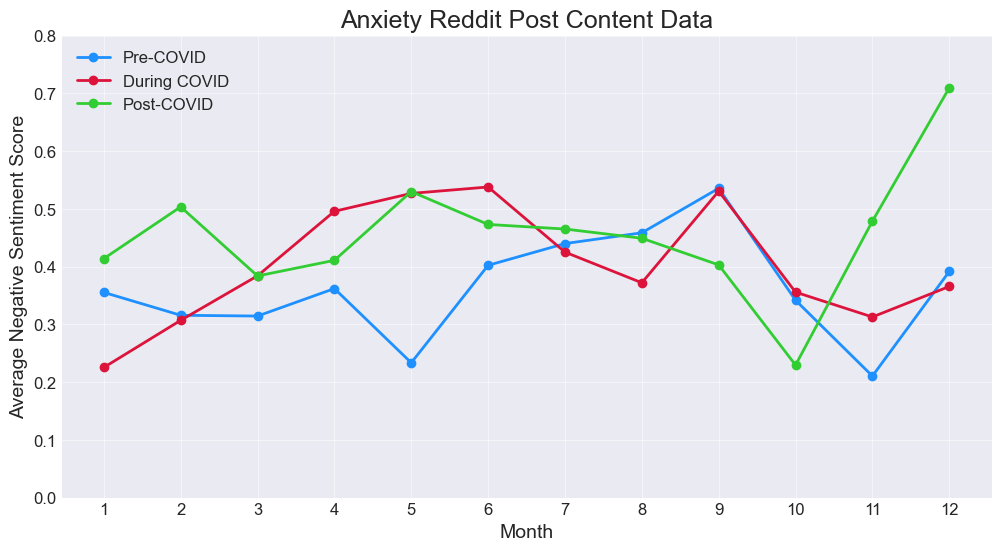

In [10]:
def postsPerMonth(df):
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    return df.groupby('month').count()['uniquePostID']

def postsSumNegByMonth(df):
    df['date'] = pd.to_datetime(df['date'])
    df['month'] = df['date'].dt.month
    return df.groupby(df['date'].dt.month)['roberta_neg'].sum()

preCovidPostPerMonthData = postsPerMonth(preMentalHealthContentDF)
perCovidPostPerMonthNegSum = postsSumNegByMonth(preMentalHealthContentDF)
preCovidNegPerMonthAverage = perCovidPostPerMonthNegSum / preCovidPostPerMonthData
print(preCovidNegPerMonthAverage)

duringCovidPostPerMonthData = postsPerMonth(duringMentalHealthContentDF)
duringCovidPostPerMonthNegSum = postsSumNegByMonth(duringMentalHealthContentDF)
duringCovidNegPerMonthAverage = duringCovidPostPerMonthNegSum / duringCovidPostPerMonthData
print(duringCovidNegPerMonthAverage)

postCovidPostPerMonthData = postsPerMonth(postMentalHealthContentDF)
postCovidPostPerMonthNegSum = postsSumNegByMonth(postMentalHealthContentDF)
postCovidNegPerMonthAverage = postCovidPostPerMonthNegSum / postCovidPostPerMonthData
print(postCovidNegPerMonthAverage)

plt.style.use('seaborn-darkgrid')

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(preCovidNegPerMonthAverage, label='Pre-COVID', color='dodgerblue', linewidth=2, marker='o')
plt.plot(duringCovidNegPerMonthAverage, label='During COVID', color='crimson', linewidth=2, marker='o')
plt.plot(postCovidNegPerMonthAverage, label='Post-COVID', color='limegreen', linewidth=2, marker='o')

# Customize the plot
plt.title('Anxiety Reddit Post Content Data', fontsize=18)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average Negative Sentiment Score', fontsize=14)
plt.xticks(range(1, 13), fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, .8)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)

# Show the plot
plt.show()